In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor

In [3]:
df=pd.read_csv('final_crop.csv')
df

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,temperature,humidity,ph,rainfall,N_percent,P_percent,K_percent,total_yield,Fertilizer_per_ha,Pesticide_per_ha,Soil_Type
0,Arecanut,Whole Year,Assam,73814.0,56708,2051.4,7024878.4,22882.3,0.80,26.5,47.5,6.95,298.6,56.8,20.6,22.7,5.905120e+04,95.170000,0.309999,Laterite
1,Arhar/Tur,Kharif,Assam,6637.0,4685,2051.4,631643.3,2057.5,0.71,25.6,56.2,6.49,298.6,46.3,27.0,26.7,4.712270e+03,95.170002,0.310005,Sandy Loam
2,Castor seed,Kharif,Assam,796.0,22,2051.4,75755.3,246.8,0.24,25.3,73.5,6.78,298.6,49.6,27.3,23.1,1.910400e+02,95.169975,0.310050,Sandy Loam
3,Coconut,Whole Year,Assam,19656.0,126905000,2051.4,1870661.5,6093.4,5238.05,29.4,59.4,6.39,225.6,47.4,28.3,24.3,1.029591e+08,95.169999,0.310002,Loamy
4,Cotton(lint),Kharif,Assam,1739.0,794,2051.4,165500.6,539.1,0.42,26.3,50.8,6.77,99.9,49.3,20.5,30.2,7.303800e+02,95.169983,0.310006,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17596,Small millets,Kharif,Nagaland,4000.0,2000,1498.0,395200.0,1160.0,0.50,36.4,33.3,6.25,298.6,42.7,28.1,29.2,2.000000e+03,98.800000,0.290000,Loamy
17597,Wheat,Rabi,Nagaland,1000.0,3000,1498.0,98800.0,290.0,3.00,13.9,46.1,6.13,298.6,55.4,21.4,23.2,3.000000e+03,98.800000,0.290000,Alluvial
17598,Maize,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.1,96373.7,1.28,25.5,61.7,6.18,109.8,55.6,24.5,19.9,3.979302e+05,95.170000,0.310000,Alluvial
17599,Rice,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.8,85481.3,0.02,25.9,84.5,5.22,298.6,54.4,27.2,18.4,5.514920e+03,95.170000,0.310000,Clayey


In [4]:
df=df.drop(columns=['Production','rainfall'])
df

,Crop,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield,temperature,humidity,ph,N_percent,P_percent,K_percent,total_yield,Fertilizer_per_ha,Pesticide_per_ha,Soil_Type
0,Arecanut,Whole Year,Assam,73814.0,2051.4,7024878.4,22882.3,0.80,26.5,47.5,6.95,56.8,20.6,22.7,5.905120e+04,95.170000,0.309999,Laterite
1,Arhar/Tur,Kharif,Assam,6637.0,2051.4,631643.3,2057.5,0.71,25.6,56.2,6.49,46.3,27.0,26.7,4.712270e+03,95.170002,0.310005,Sandy Loam
2,Castor seed,Kharif,Assam,796.0,2051.4,75755.3,246.8,0.24,25.3,73.5,6.78,49.6,27.3,23.1,1.910400e+02,95.169975,0.310050,Sandy Loam
3,Coconut,Whole Year,Assam,19656.0,2051.4,1870661.5,6093.4,5238.05,29.4,59.4,6.39,47.4,28.3,24.3,1.029591e+08,95.169999,0.310002,Loamy
4,Cotton(lint),Kharif,Assam,1739.0,2051.4,165500.6,539.1,0.42,26.3,50.8,6.77,49.3,20.5,30.2,7.303800e+02,95.169983,0.310006,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17596,Small millets,Kharif,Nagaland,4000.0,1498.0,395200.0,1160.0,0.50,36.4,33.3,6.25,42.7,28.1,29.2,2.000000e+03,98.800000,0.290000,Loamy
17597,Wheat,Rabi,Nagaland,1000.0,1498.0,98800.0,290.0,3.00,13.9,46.1,6.13,55.4,21.4,23.2,3.000000e+03,98.800000,0.290000,Alluvial
17598,Maize,Kharif,Jammu and Kashmir,310883.0,1356.2,29586735.1,96373.7,1.28,25.5,61.7,6.18,55.6,24.5,19.9,3.979302e+05,95.170000,0.310000,Alluvial
17599,Rice,Kharif,Jammu and Kashmir,275746.0,1356.2,26242746.8,85481.3,0.02,25.9,84.5,5.22,54.4,27.2,18.4,5.514920e+03,95.170000,0.310000,Clayey


In [5]:
df['Crop'].value_counts()

Crop
Rice                     1023
Maize                     852
Moong(Green Gram)         723
Urad                      712
Sesamum                   665
Potato                    616
Rapeseed &Mustard         513
Bajra                     512
Jowar                     500
Arhar/Tur                 497
Ragi                      494
Gram                      475
Onion                     443
Sunflower                 433
Dry chillies              413
Small millets             394
Cotton(lint)              366
Horse-gram                362
Tobacco                   355
Groundnut                 340
Soyabean                  338
Turmeric                  333
Other Kharif pulses       321
Peas & beans (Pulses)     318
Masoor                    315
Ginger                    314
Linseed                   300
Castor seed               296
Other  Rabi pulses        294
Barley                    291
Sweet potato              267
Sugarcane                 251
Garlic                    247
Banan

In [6]:
df.isnull().sum()

Crop                 0
Season               0
State                0
Area                 0
Annual_Rainfall      0
Fertilizer           0
Pesticide            0
Yield                0
temperature          0
humidity             0
ph                   0
N_percent            0
P_percent            0
K_percent            0
total_yield          0
Fertilizer_per_ha    0
Pesticide_per_ha     0
Soil_Type            0
dtype: int64

## DETECTING THE OUTLIERS BY PLOTTING BOXPLOT

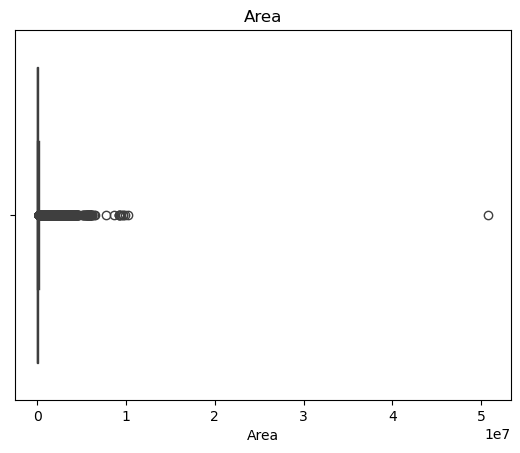

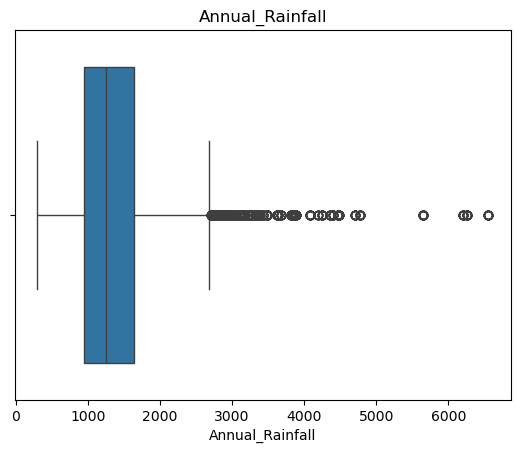

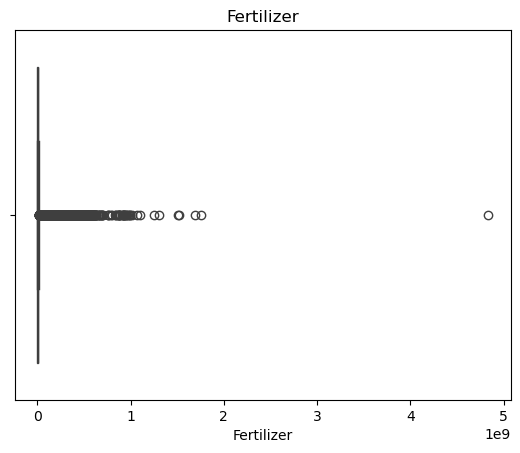

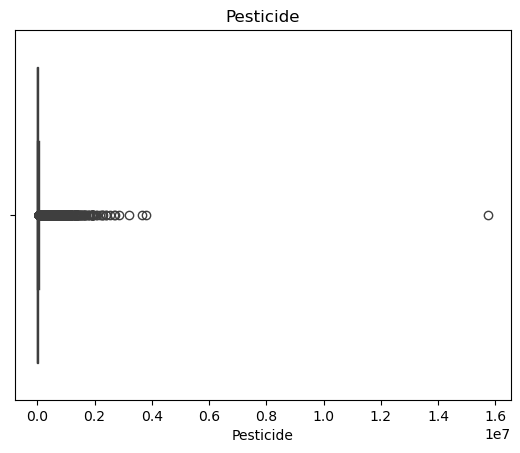

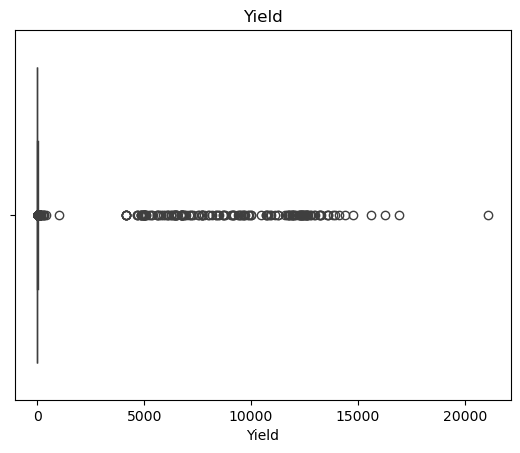

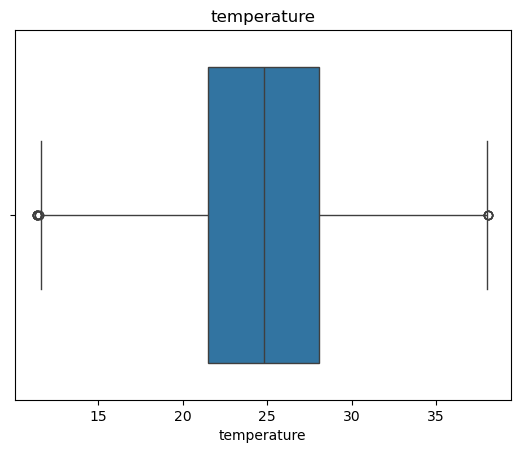

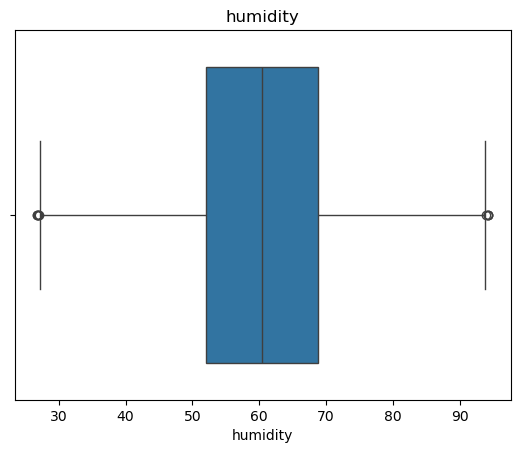

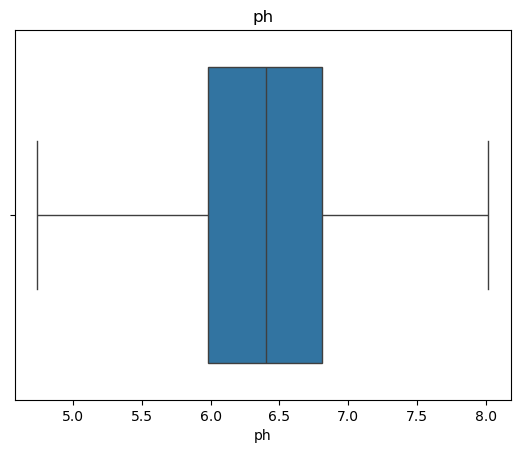

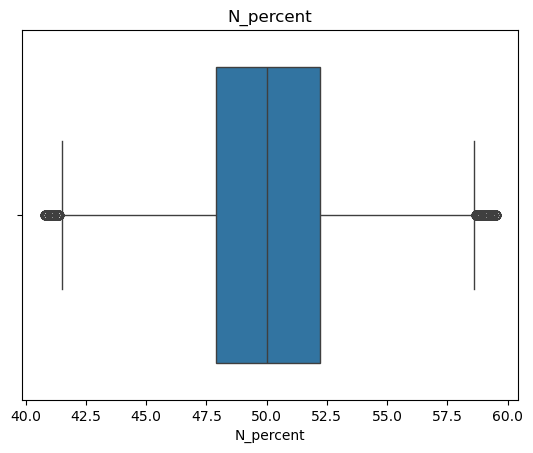

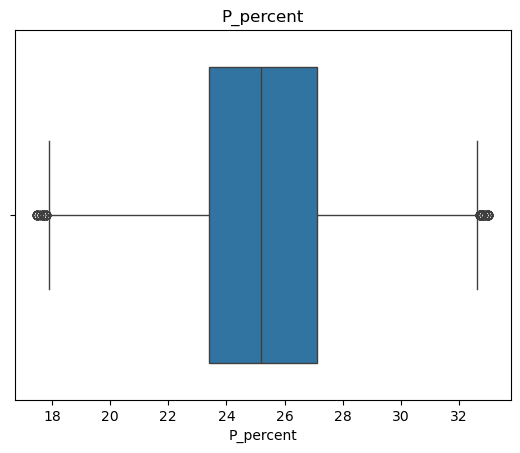

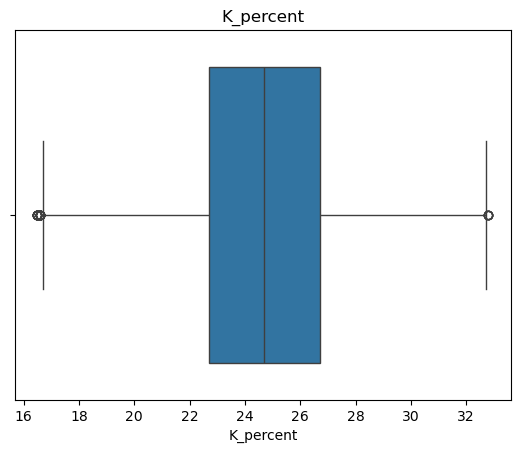

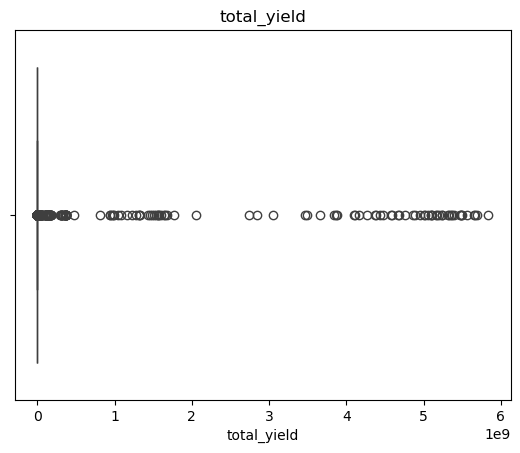

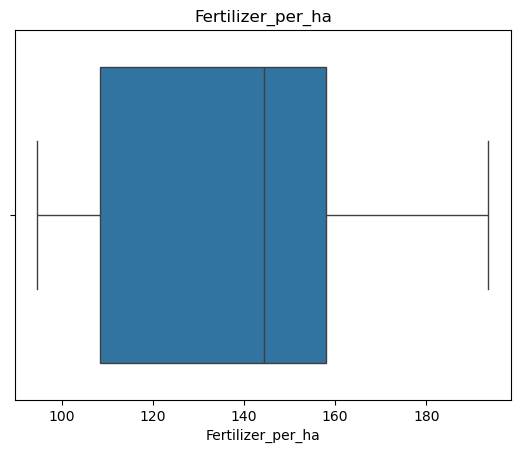

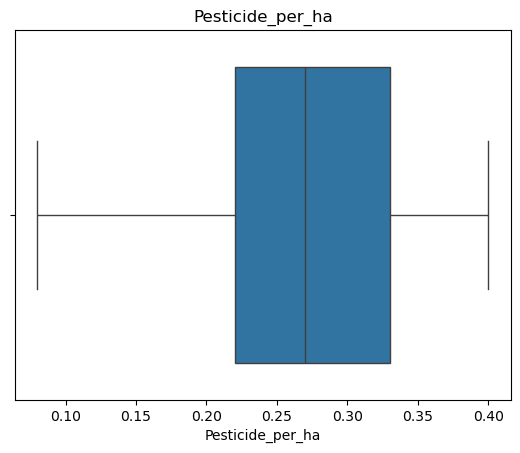

In [7]:
numeric_col=df.select_dtypes(include='number').columns

for col in numeric_col:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## REMOVING THE NULL VALUES
### CAPPING

In [8]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))
    print(f"Column:-{col}\n lower={lower}\n upper={upper}\n")

Column:-Area
 lower=-96708.5
 upper=164807.5

Column:-Annual_Rainfall
 lower=-102.10000000000014
 upper=2678.7000000000003

Column:-Fertilizer
 lower=-12948940.799999999
 upper=22071968.0

Column:-Pesticide
 lower=-25885.800000000003
 upper=44071.0

Column:-Yield
 lower=-1.9399999999999995
 upper=4.779999999999999

Column:-temperature
 lower=11.599999999999998
 upper=38.0

Column:-humidity
 lower=27.050000000000008
 upper=93.85

Column:-ph
 lower=4.735000000000001
 upper=8.054999999999998

Column:-N_percent
 lower=41.44999999999999
 upper=58.650000000000006

Column:-P_percent
 lower=17.849999999999994
 upper=32.650000000000006

Column:-K_percent
 lower=16.7
 upper=32.7

Column:-total_yield
 lower=-148690.25999999998
 upper=251314.38

Column:-Fertilizer_per_ha
 lower=33.98507441875927
 upper=232.26486529245926

Column:-Pesticide_per_ha
 lower=0.05507247206068372
 upper=0.4949610756010861



In [9]:
df

,Crop,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield,temperature,humidity,ph,N_percent,P_percent,K_percent,total_yield,Fertilizer_per_ha,Pesticide_per_ha,Soil_Type
0,Arecanut,Whole Year,Assam,73814.0,2051.4,7024878.4,22882.3,0.80,26.5,47.5,6.95,56.8,20.6,22.7,59051.20,95.170000,0.309999,Laterite
1,Arhar/Tur,Kharif,Assam,6637.0,2051.4,631643.3,2057.5,0.71,25.6,56.2,6.49,46.3,27.0,26.7,4712.27,95.170002,0.310005,Sandy Loam
2,Castor seed,Kharif,Assam,796.0,2051.4,75755.3,246.8,0.24,25.3,73.5,6.78,49.6,27.3,23.1,191.04,95.169975,0.310050,Sandy Loam
3,Coconut,Whole Year,Assam,19656.0,2051.4,1870661.5,6093.4,4.78,29.4,59.4,6.39,47.4,28.3,24.3,251314.38,95.169999,0.310002,Loamy
4,Cotton(lint),Kharif,Assam,1739.0,2051.4,165500.6,539.1,0.42,26.3,50.8,6.77,49.3,20.5,30.2,730.38,95.169983,0.310006,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17596,Small millets,Kharif,Nagaland,4000.0,1498.0,395200.0,1160.0,0.50,36.4,33.3,6.25,42.7,28.1,29.2,2000.00,98.800000,0.290000,Loamy
17597,Wheat,Rabi,Nagaland,1000.0,1498.0,98800.0,290.0,3.00,13.9,46.1,6.13,55.4,21.4,23.2,3000.00,98.800000,0.290000,Alluvial
17598,Maize,Kharif,Jammu and Kashmir,164807.5,1356.2,22071968.0,44071.0,1.28,25.5,61.7,6.18,55.6,24.5,19.9,251314.38,95.170000,0.310000,Alluvial
17599,Rice,Kharif,Jammu and Kashmir,164807.5,1356.2,22071968.0,44071.0,0.02,25.9,84.5,5.22,54.4,27.2,18.4,5514.92,95.170000,0.310000,Clayey


## AFTER CAPPING NULL VALUES

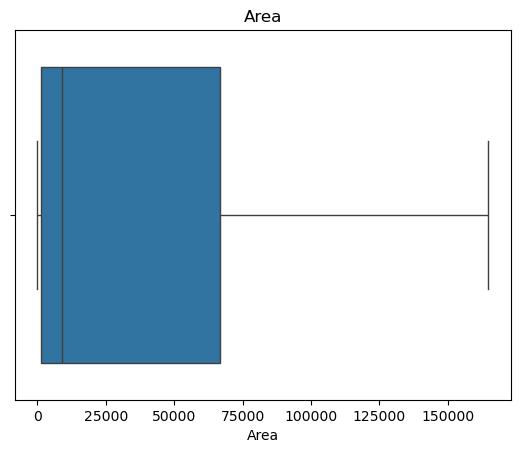

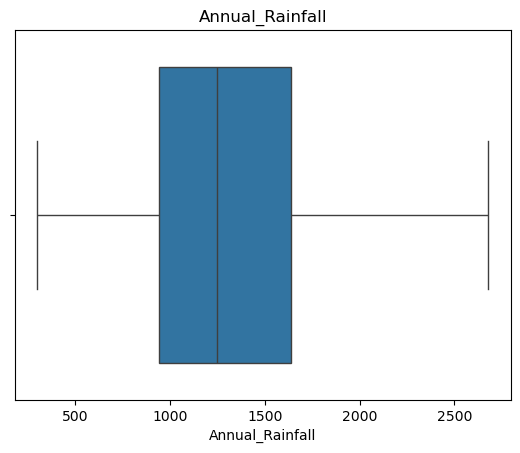

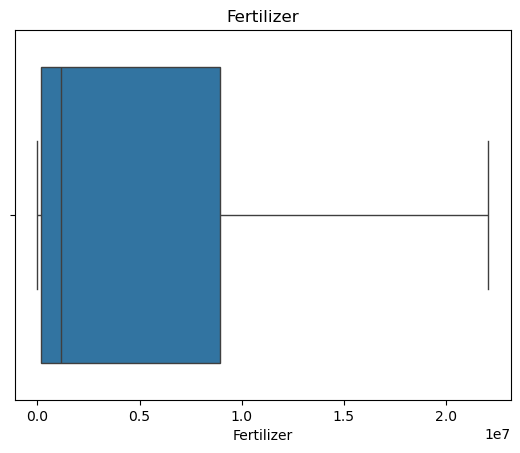

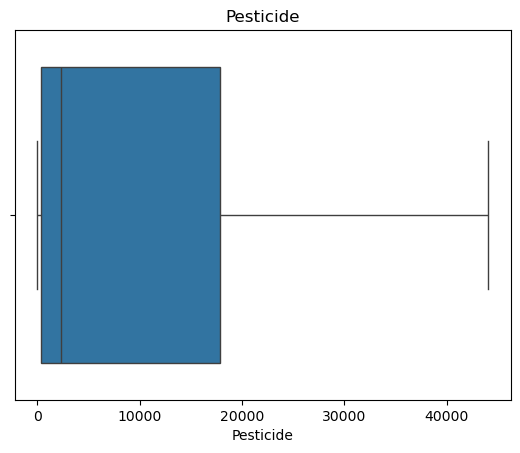

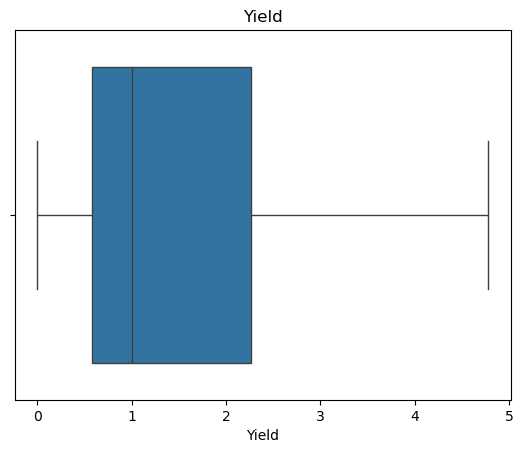

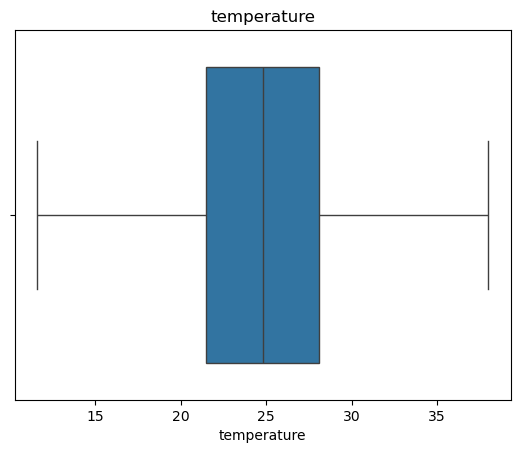

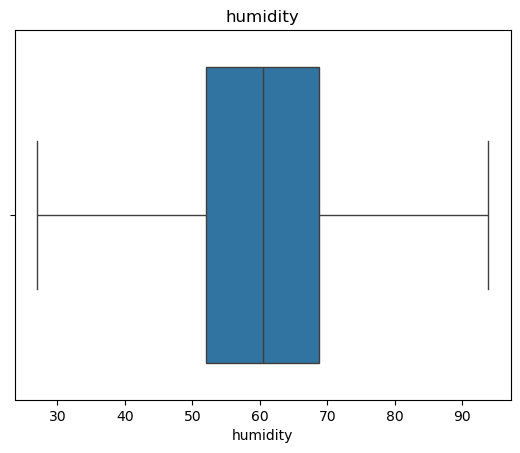

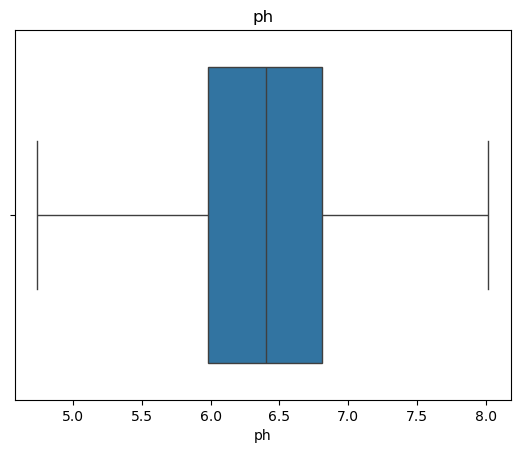

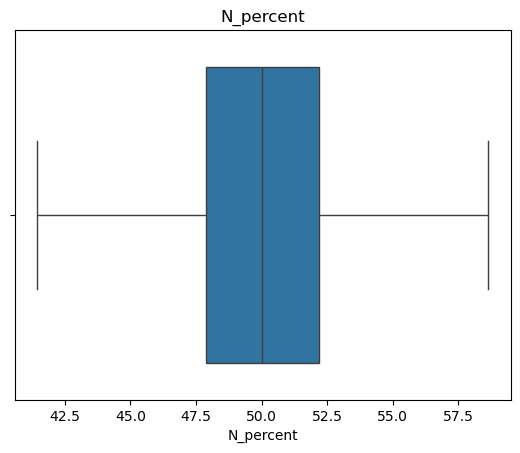

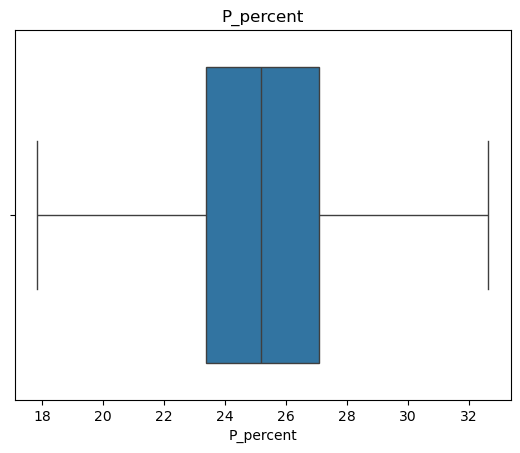

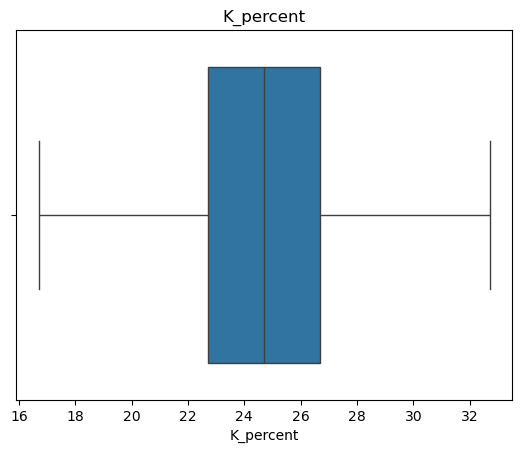

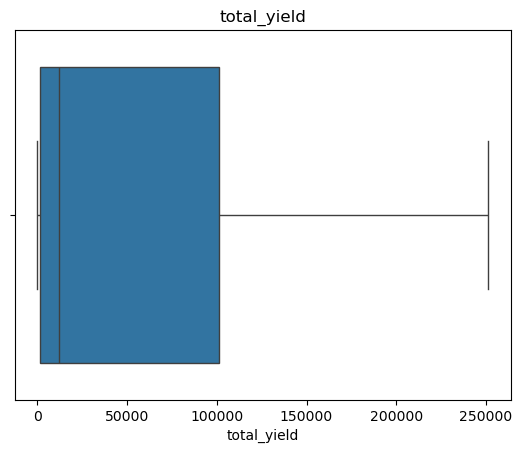

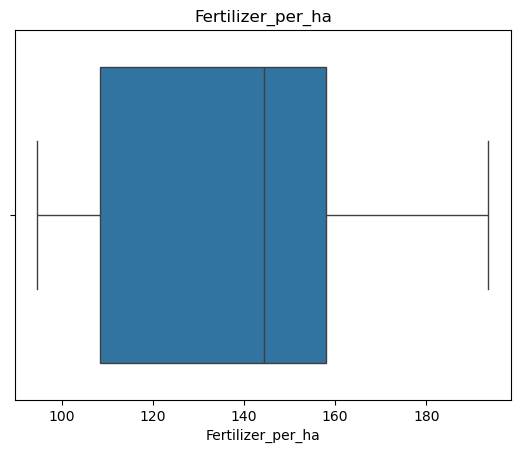

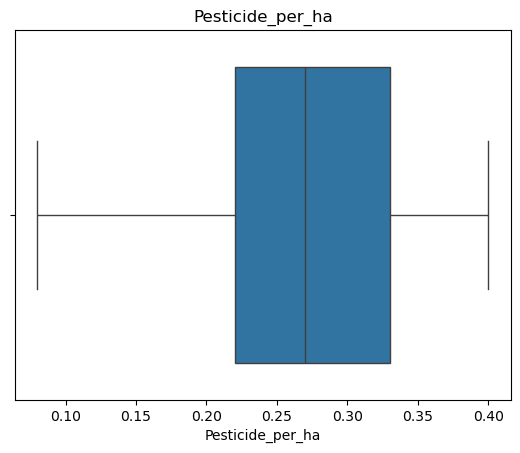

In [10]:
for col in numeric_col:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## Performing Train-Test-Split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Yield', 'total_yield', 'Fertilizer_per_ha',
        'Pesticide_per_ha', 'Fertilizer', 'Pesticide'],axis=1),
                                                 df[['Yield', 'total_yield', 'Fertilizer_per_ha',
        'Pesticide_per_ha', 'Fertilizer', 'Pesticide']],
                                                 test_size=0.3,
                                                 random_state=0)

In [12]:
X_train

,Crop,Season,State,Area,Annual_Rainfall,temperature,humidity,ph,N_percent,P_percent,K_percent,Soil_Type
13672,Coriander,Rabi,Uttar Pradesh,7002.0,965.3,24.9,53.0,7.73,52.2,22.5,25.2,Loamy
4477,Cashewnut,Whole Year,Goa,56735.0,2678.7,32.4,66.5,7.08,43.4,28.6,28.1,Loamy
10885,Moth,Kharif,Gujarat,45700.0,890.5,19.4,64.6,6.33,50.8,25.4,23.8,Loamy
13396,Horse-gram,Kharif,Haryana,200.0,554.7,27.0,56.3,6.52,48.9,27.0,24.1,Loamy
9256,Other Rabi pulses,Rabi,Himachal Pradesh,25.0,1095.4,17.4,50.6,6.52,44.0,26.8,29.2,Loamy
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,Maize,Kharif,Haryana,13777.0,443.8,33.3,54.5,5.84,51.4,26.0,22.7,Alluvial
13123,Cotton(lint),Kharif,Uttar Pradesh,7688.0,596.7,26.5,69.2,6.38,49.2,19.8,31.0,Black
9845,Sunflower,Kharif,Uttarakhand,37.0,1363.7,26.9,69.0,6.97,51.3,22.4,26.3,Alluvial
10799,Linseed,Rabi,Bihar,23434.0,1097.1,22.2,56.8,6.67,48.9,25.0,26.1,Loamy


## CHECKING WETHER THE DATA IS NORMALY DISTRIBUTED OR NOT?!

C:\Users\tanish\AppData\Local\Temp\ipykernel_23144\699889427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


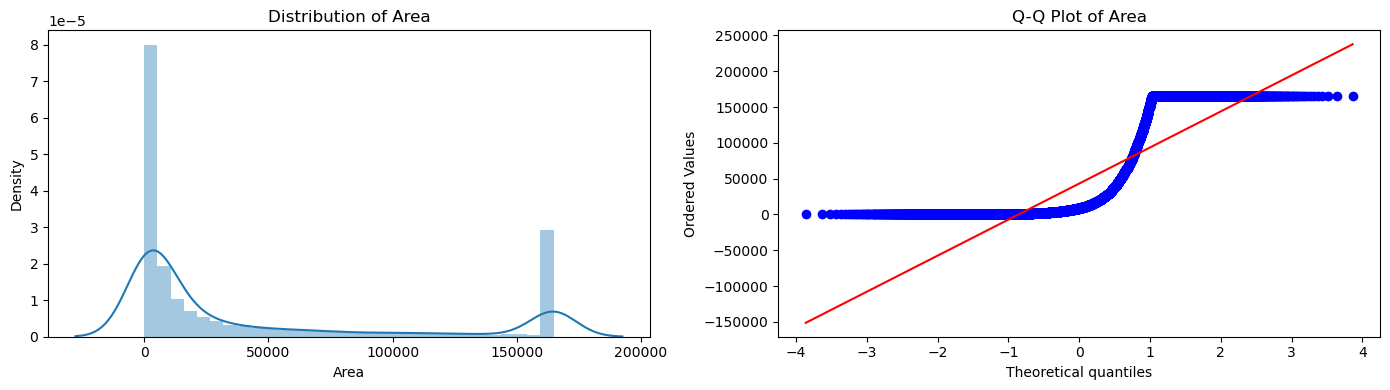

C:\Users\tanish\AppData\Local\Temp\ipykernel_23144\699889427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


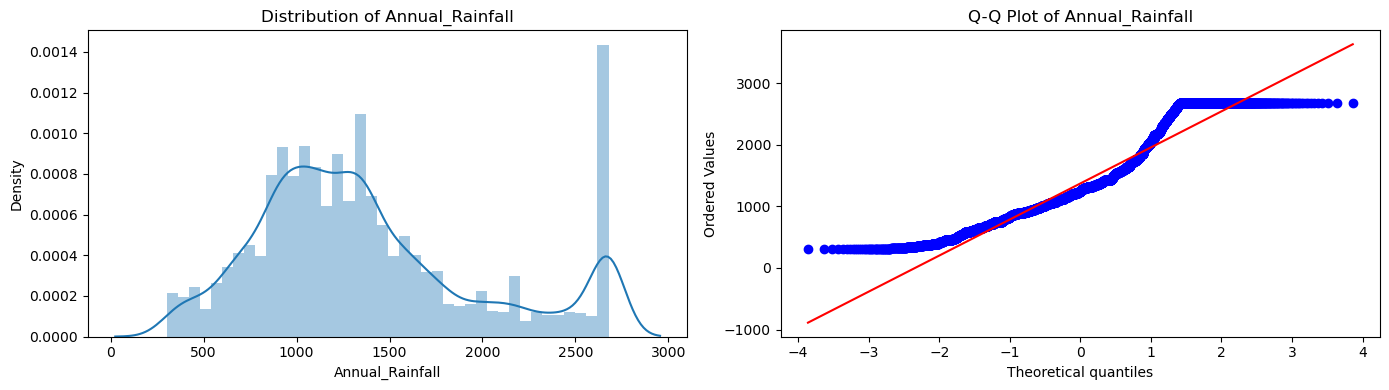

C:\Users\tanish\AppData\Local\Temp\ipykernel_23144\699889427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


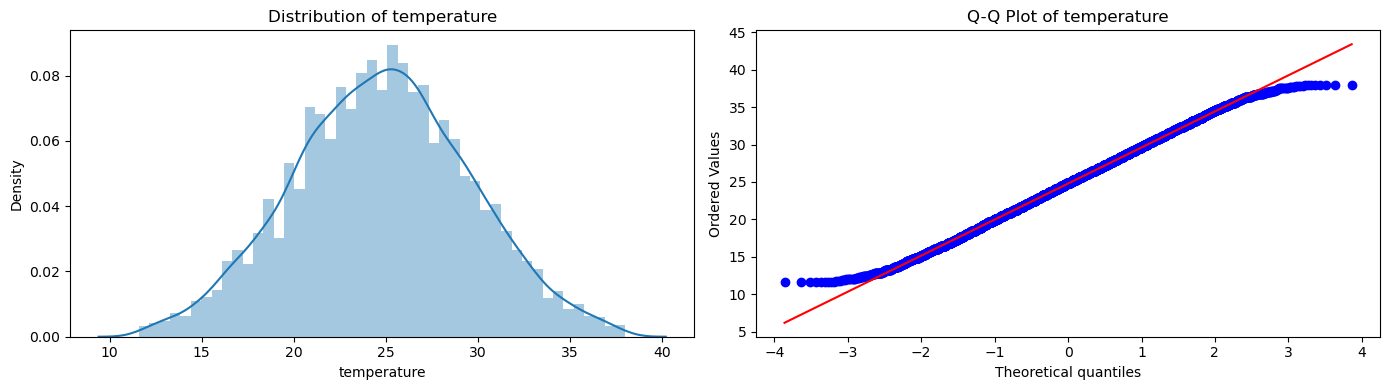

C:\Users\tanish\AppData\Local\Temp\ipykernel_23144\699889427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


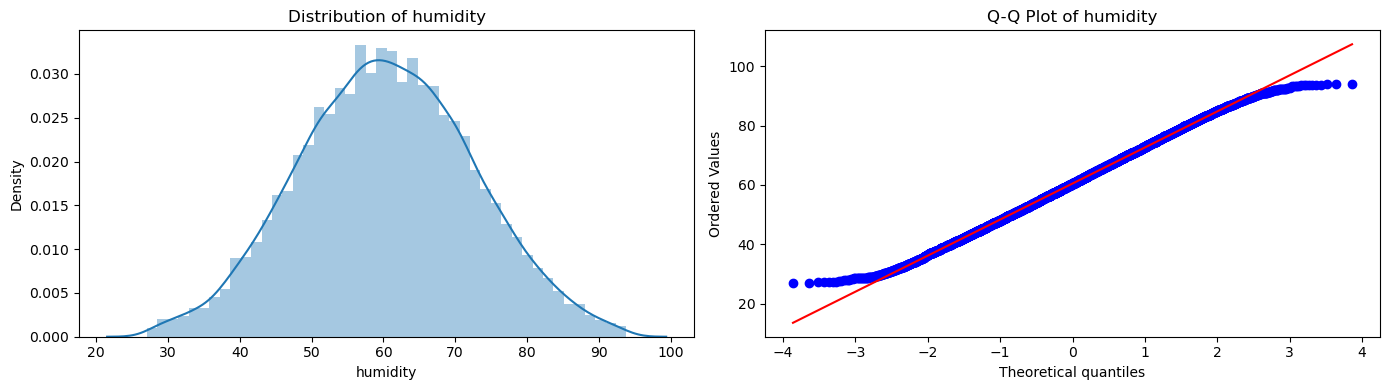

C:\Users\tanish\AppData\Local\Temp\ipykernel_23144\699889427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


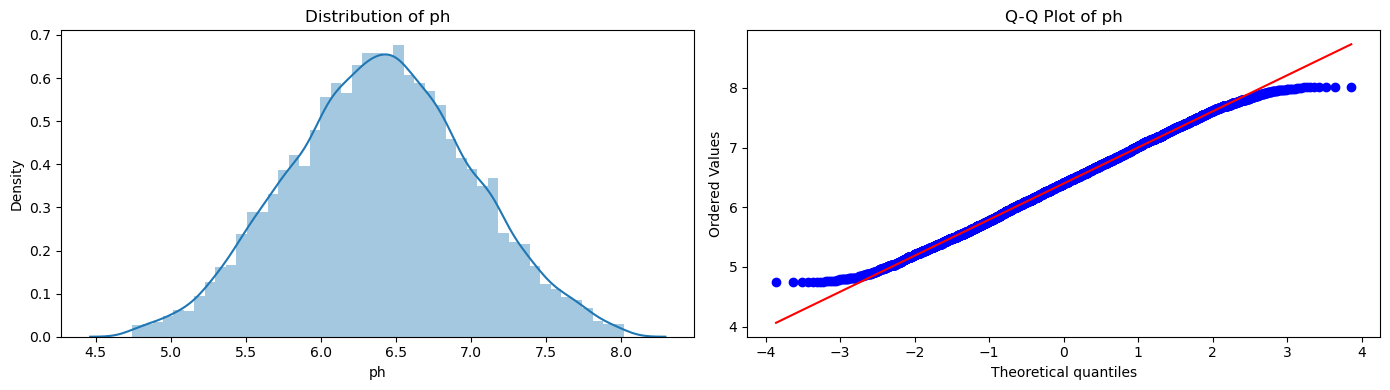

C:\Users\tanish\AppData\Local\Temp\ipykernel_23144\699889427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


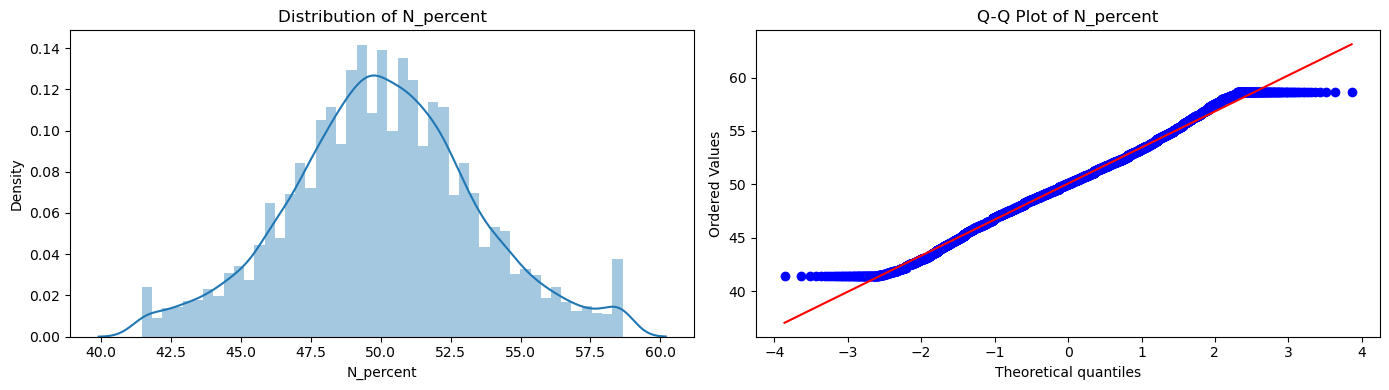

C:\Users\tanish\AppData\Local\Temp\ipykernel_23144\699889427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


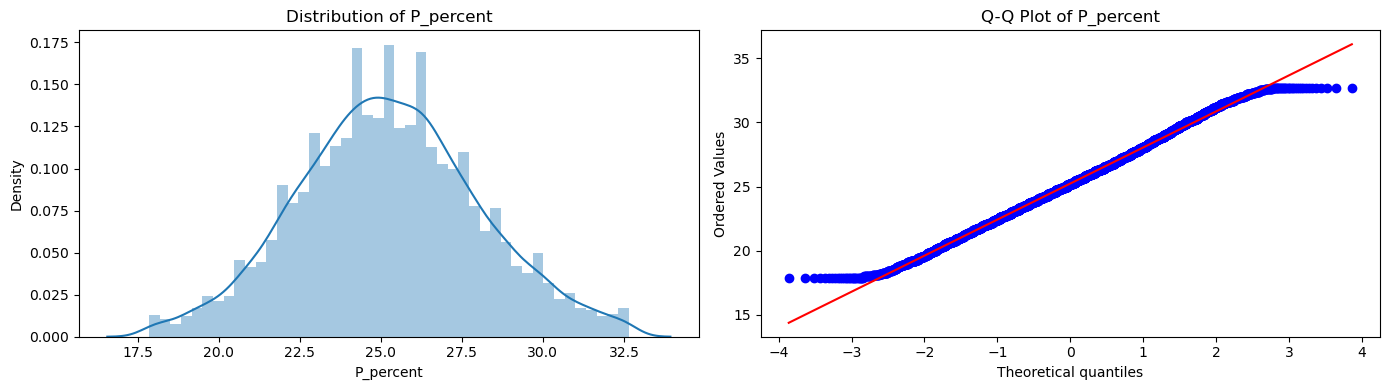

C:\Users\tanish\AppData\Local\Temp\ipykernel_23144\699889427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


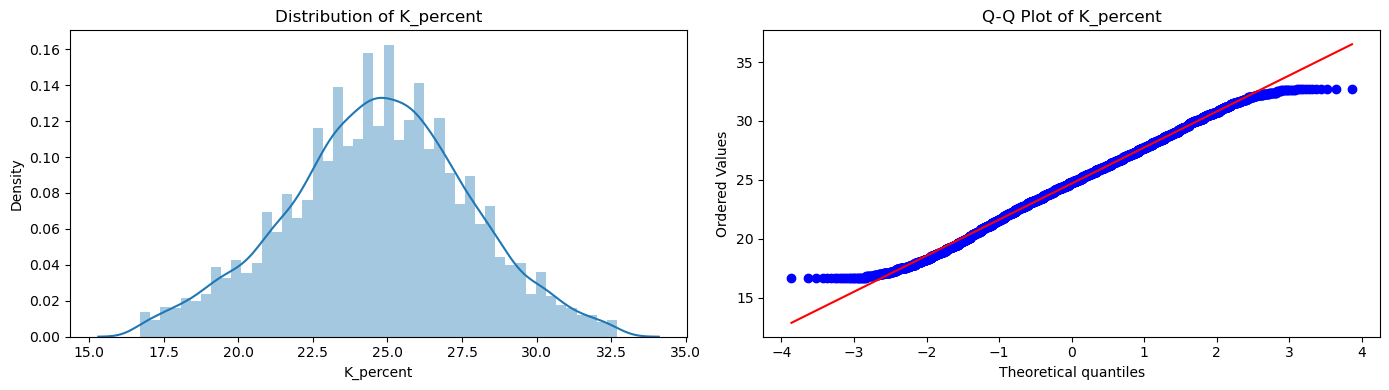

In [13]:
numeric_col_after_split=X_train.select_dtypes(include='number').columns

for col in numeric_col_after_split:
    plt.figure(figsize=(14, 4))
    
    plt.subplot(121)
    sns.distplot(X_train[col])  # `sns.distplot` is deprecated
    plt.title(f'Distribution of {col}')
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [14]:
print(X_train[['humidity', 'ph', 'N_percent', 'P_percent', 'K_percent']].nunique())

humidity     656
ph           329
N_percent    174
P_percent    150
K_percent    161
dtype: int64


## Checking the dtype of X_train Cols

In [15]:
for col in numeric_col_after_split:
    print(type(X_train[col]))
    print(X_train[col].shape)
    print(X_train[col].head())

<class 'pandas.core.series.Series'>
(12320,)
13672     7002.0
4477     56735.0
10885    45700.0
13396      200.0
9256        25.0
Name: Area, dtype: float64
<class 'pandas.core.series.Series'>
(12320,)
13672     965.3
4477     2678.7
10885     890.5
13396     554.7
9256     1095.4
Name: Annual_Rainfall, dtype: float64
<class 'pandas.core.series.Series'>
(12320,)
13672    24.9
4477     32.4
10885    19.4
13396    27.0
9256     17.4
Name: temperature, dtype: float64
<class 'pandas.core.series.Series'>
(12320,)
13672    53.0
4477     66.5
10885    64.6
13396    56.3
9256     50.6
Name: humidity, dtype: float64
<class 'pandas.core.series.Series'>
(12320,)
13672    7.73
4477     7.08
10885    6.33
13396    6.52
9256     6.52
Name: ph, dtype: float64
<class 'pandas.core.series.Series'>
(12320,)
13672    52.2
4477     43.4
10885    50.8
13396    48.9
9256     44.0
Name: N_percent, dtype: float64
<class 'pandas.core.series.Series'>
(12320,)
13672    22.5
4477     28.6
10885    25.4
13396    27

### I HAVE APPLIED LOG AND BOX TRANSFORMATION AND AFTER SEIING THE DIFFERENCE BETWEEN BOTH THE GRAPHS I DECIDED TO APPLY LOG TRANSFORMATION

In [16]:
min_area = X_train['Area'].min()
if min_area <= 0:
    X_train['Area'] = X_train['Area'] + abs(min_area) + 1  # shift so min > 0
    X_test['Area'] = X_test['Area'] + abs(min_area) + 1

min_rain = X_train['Annual_Rainfall'].min()
if min_rain <= 0:
    X_train['Annual_Rainfall'] = X_train['Annual_Rainfall'] + abs(min_rain) + 1
    X_test['Annual_Rainfall'] = X_test['Annual_Rainfall'] + abs(min_rain) + 1

In [17]:
categorical_cols = ['Crop','Season','State','Soil_Type']  # replace with your actual categorical column names
log_cols = ['Area','Annual_Rainfall']

preprocessor = ColumnTransformer(transformers=[
    ('power',FunctionTransformer(np.log1p), log_cols),
    ('scale', StandardScaler(), numeric_col_after_split),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
], remainder='passthrough')

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

In [18]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('power',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Area', 'Annual_Rainfall']),
                                ('scale', StandardScaler(),
                                 Index(['Area', 'Annual_Rainfall', 'temperature', 'humidity', 'ph', 'N_percent',
       'P_percent', 'K_percent'],
      dtype='object')),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Crop', 'Season', 'State', 'Soil_Type'])])

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## SELECTING BASE ML MODEL

In [20]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
models1 = {
    "LinearRegression":MultiOutputRegressor(LinearRegression()),
    "Ridge": MultiOutputRegressor(Ridge()),
    "Lasso": MultiOutputRegressor(Lasso())   
}

In [22]:
models2={
    "DecisionTree": MultiOutputRegressor(DecisionTreeRegressor()),
    "RandomForest": MultiOutputRegressor(RandomForestRegressor()),
    "KNN":MultiOutputRegressor(KNeighborsRegressor())
}

In [23]:
models3={
    "SVR": MultiOutputRegressor(SVR()),
    "ElasticNet": MultiOutputRegressor(ElasticNet())
}

In [24]:
model4={
    'ExtraTrees': MultiOutputRegressor(ExtraTreesRegressor(n_estimators=100, random_state=42,n_jobs=-1)),
}

In [25]:
model5={
    'XGBoost': MultiOutputRegressor(xgb.XGBRegressor(n_estimators=200,       # reduce for faster training
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1  ))
}

## TESTING DIFFERENT REGRESSION MODEL AND CHECKING THE MSE

In [26]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

rmse_results = {}
r2_result={}
for name, model in models1.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),  # transformer applied inside the pipeline
        ('model', model)
    ])
    pipe.fit(X_train,y_train_log)  
    preds_log  = pipe.predict(X_test) 
    preds = np.expm1(preds_log)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    rmse_results[name] = rmse
    r2_result[name]=r2

print(rmse_results)
print(r2_result)

{'LinearRegression': 437196.89791370713, 'Ridge': 436536.9798817955, 'Lasso': 1479640.128526212}
{'LinearRegression': 0.3675972361239803, 'Ridge': 0.3732514394260173, 'Lasso': 0.32919424378349077}


In [29]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

rmse_results = {}
r2_result={}
for name, model in models2.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),  # transformer applied inside the pipeline
        ('model', model)
    ],memory=r'C:\Users\tanish\SIH\testing different models')
    pipe.fit(X_train,y_train_log)  
    preds_log  = pipe.predict(X_test) 
    preds = np.expm1(preds_log)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    rmse_results[name] = rmse
    r2_result[name]=r2

print(rmse_results)
print(r2_result)

{'DecisionTree': 547358.6198176143, 'RandomForest': 397943.86092691205, 'KNN': 563178.2895366658}
{'DecisionTree': 0.7914427989593403, 'RandomForest': 0.8918855100867993, 'KNN': 0.5305002386838568}


In [30]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

rmse_results = {}
r2_result={}
for name, model in models3.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),  # transformer applied inside the pipeline
        ('model', model)
    ],memory=r'C:\Users\tanish\SIH\testing different models')
    pipe.fit(X_train,y_train_log)  
    preds_log  = pipe.predict(X_test) 
    preds = np.expm1(preds_log)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    rmse_results[name] = rmse
    r2_result[name]=r2

print(rmse_results)
print(r2_result)

{'SVR': 468498.3384471706, 'ElasticNet': 1404358.211430981}
{'SVR': 0.5485626134418112, 'ElasticNet': 0.3391345508824044}


In [33]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

rmse_results = {}
r2_result={}

for name, model in model4.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),  # your ColumnTransformer or preprocessing
        ('model', model)
    ],memory=r'C:\Users\tanish\SIH\testing different models')
    
    # Fit on log-transformed target
    pipe.fit(X_train, y_train_log)
    
    # Predict and inverse log-transform
    preds_log = pipe.predict(X_test)
    preds = np.expm1(preds_log)
    
    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    # Store results
    rmse_results[name] = rmse
    r2_results[name] = r2

# Print results
print("RMSE:", rmse_results)
print("R²:", r2_results)

RMSE: {'ExtraTrees': 376586.2503467914}
R²: {'XGBoost': 0.7459778785705566, 'ExtraTrees': 0.874466879802119}


In [32]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

rmse_results = {}
r2_results = {}

for name, model in model5.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),  # your preprocessing pipeline
        ('model', model)                 # instance, not class
    ],memory=r'C:\Users\tanish\SIH\testing different models')
    
    # Fit on log-transformed target
    pipe.fit(X_train, y_train_log)
    
    # Predict and inverse log-transform
    preds_log = pipe.predict(X_test)
    preds = np.expm1(preds_log)
    
    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    # Store results
    rmse_results[name] = rmse
    r2_results[name] = r2

# Print results
print("RMSE:", rmse_results)
print("R²:", r2_results)

RMSE: {'XGBoost': 396574.61833314697}
R²: {'XGBoost': 0.7459778785705566}


## FROM THE ABOVE TESTING OF ALL THE ALGORITHMS,THE BEST ONE THAT FITS FOR THE MODEL IS RANDOMFOREST

## CREATING THE FINAL PIPELINE 

In [34]:
from sklearn import set_config
set_config(display='diagram')

In [35]:
final_model=Pipeline([
        ('preprocessor',preprocessor),
        ('best_model',MultiOutputRegressor(RandomForestRegressor()))
])

In [36]:
final_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Area', 'Annual_Rainfall']),
                                                 ('scale', StandardScaler(),
                                                  Index(['Area', 'Annual_Rainfall', 'temperature', 'humidity', 'ph', 'N_percent',
       'P_percent', 'K_percent'],
      dtype='object')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Crop', 'Season', 'State',
                                                   'Soil_Type'])])),
                ('best_model',
                 MultiOutputRegressor(estimator=RandomForestRegressor()))])

In [37]:
y_pred=final_model.predict(X_test)
y_pred

array([[4.78000000e+00, 2.29850325e+04, 1.41914904e+02, 2.88301527e-01,
        2.88305172e+05, 6.37515000e+02],
       [8.52100000e-01, 2.51314380e+05, 1.53251500e+02, 3.22300212e-01,
        2.20483374e+07, 4.36671230e+04],
       [9.22600000e-01, 6.33723878e+04, 1.07463101e+02, 2.42403391e-01,
        8.84578333e+06, 1.87017470e+04],
       ...,
       [1.47360000e+00, 2.44029161e+05, 1.30105606e+02, 2.40998681e-01,
        2.20376422e+07, 4.39320580e+04],
       [1.45770000e+00, 1.10087169e+03, 1.34570510e+02, 2.87163855e-01,
        1.32951925e+05, 3.18009000e+02],
       [7.09000000e-01, 1.33563630e+03, 1.43588231e+02, 3.41801363e-01,
        2.47863504e+05, 5.11100000e+02]])

## MODEL TRAINING COMPLETED NOW SAVING AND IMPORTING THE MODEL

In [38]:
import pickle
pickle.dump(final_model, open('Yield_prediction.pk1', 'wb'))